In [1]:
#Personal Financial Planner

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets

In [4]:
my_btc = 1.2

In [5]:
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')

The current value of your 1.2 BTC is $68684.46
The current value of your 5.3 ETH is $21274.05


In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
print(alpaca_api_key)
print(alpaca_secret_key)

PK3A1ZK2OYTVY15JRDOY
NOPtQvpAYEgdIuFjsEP64GlcdO2GCjp9KwPllwtQ


In [53]:
# Format current date as ISO format
today = pd.Timestamp('2021-03-26', tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments.tail()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-21 04:00:00+00:00  107.58  107.649  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.880  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.210  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.035  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.650  105.9750  106.10  10295813   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-21 04:00:00+00:00       27316  107.310151  444.45  446.46  440.68   
2022-03-22 04:00:00+00:00       51796  106.746967  445.99  450.58  445.86   
2022-03-23 04:00:00+00:00       27348  106.991875  446.90  448.49  443.71   
2022-03-24 04:00:00+00:00       23320  106.879605  445.82  450.50  444.76   
2022-03-25 04:00:00+00:00       37569  106.190724  451.09  452.98  448.43   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-21 04:00:00+00:00  444.30  85377983      912432  443.796432  
2022-03-22 04:00:00+00:00  449.59  73674202      623610  448.558595  
2022-03-23 04:00:00+00:00  443.80  77982935      627281  446.058683  
2022-03-24 04:00:00+00:00  450.48  61411569      526865  447.609014  
2022-03-25 04:00:00+00:00  452.69  77199328      661033  451.047221

In [52]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments['AGG']['close'][-1])
spy_close_price = float(df_investments['SPY']['close'][-1])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [54]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


In [35]:
#Savings Health Anaylsis

In [101]:
 # Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

d = {'amount': [crypto, shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(data = d, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,89958.508565
shares,43854.500000


<AxesSubplot:title={'center':'Savings Analysis'}, ylabel='amount'>

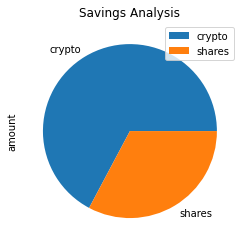

In [102]:
 # Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings Analysis")

In [103]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
goal = emergency_fund-total_savings
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations! You have met your financial goal!")
else:
    print(f"You need ${goal:0.2f} to reach your goal")

Congratulations! You have enough money in your emergency fund!


In [37]:
#Retirement Planning

In [38]:
#Monte Carlo Simulation

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-25', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

In [19]:
# Get current closing prices for SPY and AGG
ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date, end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker[ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker[ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
ticker.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.4200  108.49  3717721   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-03-27 04:00:00+00:00       11112  108.600681  231.97  233.92  231.610   
2017-03-28 04:00:00+00:00        9144  108.514754  233.32  235.81  233.140   
2017-03-29 04:00:00+00:00       10135  108.539517  235.00  235.81  234.725   
2017-03-30 04:00:00+00:00        8188  108.440472  235.50  236.52  235.270   
2017-03-31 04:00:00+00:00       13532  108.485913  235.91  236.51  235.680   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-03-27 04:00:00+00:00  233.62  87454452      289784  233.041576  
2017-03-28 04:00:00+00:00  235.32  93483915      277352  234.596748  
2017-03-29 04:00:00+00:00  235.54  61950354      194177  235.429910  
2017-03-30 04:00:00+00:00  236.29  56737890      180049  236.126775  
2017-03-31 04:00:00+00:00  235.74  73733094      207326  236.011666

In [ ]:
#not sure how to set a limit of 1000

In [47]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [39]:
MC_thirtyyear = MCSimulation(
    portfolio_data = ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.4200  108.49  3717721   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-27 04:00:00+00:00       11112  108.600681          NaN  231.97   
2017-03-28 04:00:00+00:00        9144  108.514754    -0.002302  233.32   
2017-03-29 04:00:00+00:00       10135  108.539517     0.002215  235.00   
2017-03-30 04:00:00+00:00        8188  108.440472    -0.001841  235.50   
2017-03-31 04:00:00+00:00       13532  108.485913     0.000738  235.91   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2017-03-27 04:00:00+00:00  233.92  231.610  233.62  87454452      289784   
2017-03-28 04:00:00+00:00  235.81  233.140  235.32  93483915      277352   
2017-03-29 04:00:00+00:00  235.81  234.725  235.54  61950354      194177   
2017-03-30 04:00:00+00:00  236.52  235.270  236.29  56737890      180049   
2017-03-31 04:00:00+00:00  236.51  235.680  235.74  73733094      207326   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-27 04:00:00+00:00  233.041576          NaN  
2017-03-28 04:00:00+00:00  234.596748     0.007277  
2017-03-29 04:00:00+00:00  235.429910     0.000935  
2017-03-30 04:00:00+00:00  236.126775     0.003184  
2017-03-31 04:00:00+00:00  236.011666    -0.002328

In [24]:
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/katharinezenta/All Class notes/Week 5 APIs/Financial Planning homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998721,1.002684,1.008182,0.995742,0.998594,1.002115,1.009966,0.988440,1.002624,1.007797,...,0.996849,1.000794,1.001480,1.007534,1.004986,0.990103,1.000009,0.997752,0.988375,1.005229
2,1.001673,1.007075,1.012221,0.985961,0.997865,1.002902,1.024535,0.996333,0.997552,1.003820,...,0.999300,1.007233,1.012437,1.011693,0.999830,0.997058,1.002902,1.007048,0.989505,1.018589
3,1.005213,1.005068,1.006860,0.985603,0.986744,1.000430,1.018438,0.998399,1.001861,0.996968,...,1.007230,1.000125,1.006625,0.996435,1.002172,0.990073,1.004689,1.009200,0.978783,1.012253
4,1.010119,1.002866,1.002346,0.982596,0.988585,0.995173,1.016836,1.005231,0.996721,0.999866,...,1.012531,0.998189,1.003105,0.998056,1.017083,0.992260,0.987332,0.998665,0.984488,1.012261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.594829,4.388031,15.497054,4.922042,9.751357,48.109625,9.519802,3.597641,8.629376,16.351811,...,5.093477,7.484326,20.747296,5.201456,8.491933,21.697999,16.515846,16.426036,18.680751,6.122724
7557,14.584151,4.431594,15.447676,4.903232,9.732174,47.899296,9.613510,3.624625,8.643934,16.311222,...,5.101500,7.347525,20.615310,5.239313,8.402851,21.549584,16.712618,16.487614,18.963878,6.179188
7558,14.761009,4.442534,15.192934,4.866025,9.733318,48.319087,9.495795,3.664685,8.596992,16.373080,...,5.089464,7.302045,20.572786,5.176142,8.350422,21.758150,16.635636,16.593893,18.754311,6.201868
7559,14.841967,4.448127,15.125687,4.850418,9.856225,48.140579,9.444061,3.678004,8.495481,16.339357,...,5.109206,7.343137,20.874849,5.129598,8.339363,22.004784,16.654575,16.612077,18.849639,6.254523


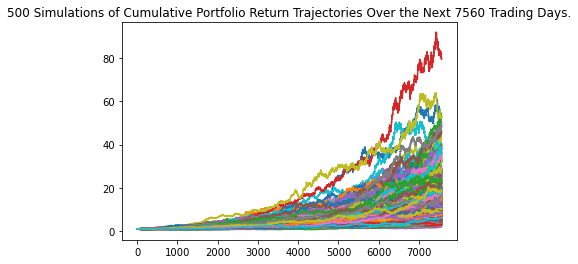

In [25]:
line_plot = MC_thirtyyear.plot_simulation()

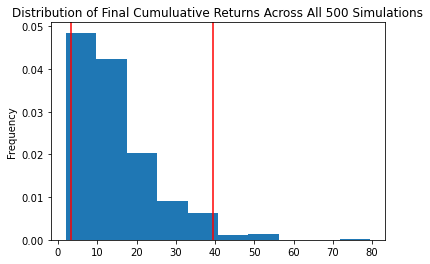

In [26]:
dist_plot = MC_thirtyyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cumulative_return = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(sum_cumulative_return)

count           500.000000
mean             14.912789
std              10.141581
min               1.990020
25%               7.445650
50%              12.478327
75%              19.161496
max              79.491750
95% CI Lower      3.370652
95% CI Upper     39.502399
Name: 7560, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_cumulative_return[8]*20000,2)
ci_upper = round(sum_cumulative_return[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $67413.04 and $790047.98


In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_cumulative_return[8]*30000,2)
ci_upper = round(sum_cumulative_return[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $101119.56 and $1185071.97


In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.4200  108.49  3717721   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-27 04:00:00+00:00       11112  108.600681          NaN  231.97   
2017-03-28 04:00:00+00:00        9144  108.514754    -0.002302  233.32   
2017-03-29 04:00:00+00:00       10135  108.539517     0.002215  235.00   
2017-03-30 04:00:00+00:00        8188  108.440472    -0.001841  235.50   
2017-03-31 04:00:00+00:00       13532  108.485913     0.000738  235.91   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2017-03-27 04:00:00+00:00  233.92  231.610  233.62  87454452      289784   
2017-03-28 04:00:00+00:00  235.81  233.140  235.32  93483915      277352   
2017-03-29 04:00:00+00:00  235.81  234.725  235.54  61950354      194177   
2017-03-30 04:00:00+00:00  236.52  235.270  236.29  56737890      180049   
2017-03-31 04:00:00+00:00  236.51  235.680  235.74  73733094      207326   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-27 04:00:00+00:00  233.041576          NaN  
2017-03-28 04:00:00+00:00  234.596748     0.007277  
2017-03-29 04:00:00+00:00  235.429910     0.000935  
2017-03-30 04:00:00+00:00  236.126775     0.003184  
2017-03-31 04:00:00+00:00  236.011666    -0.002328

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/katharinezenta/All Class notes/Week 5 APIs/Financial Planning homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998609,0.994776,0.997593,0.988064,0.997177,0.993995,1.007774,0.985692,1.010095,0.987117,...,0.998223,1.005533,1.005522,0.996520,1.003450,1.007115,0.993283,1.003991,1.009817,1.009782
2,0.998587,0.991636,1.003045,0.982861,0.989672,0.998225,1.023830,0.979732,1.003700,0.995760,...,0.998365,1.010369,1.006232,1.000495,1.008236,1.015674,0.991009,1.004625,1.007302,1.005334
3,0.997905,0.990631,1.012528,0.985721,0.982594,1.004998,1.015873,0.973265,1.003903,0.984008,...,0.989128,1.001062,1.015827,0.997372,1.008918,1.022629,1.000095,1.012613,1.010683,1.011401
4,0.994329,0.998563,1.004759,0.984273,0.987783,1.002317,1.025337,0.986785,0.998023,0.982065,...,0.986735,0.994615,1.019239,0.985883,1.016848,1.019146,1.000512,1.013285,1.017988,1.010108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.901483,1.656285,1.878422,1.784536,2.670520,1.348367,1.788882,1.653015,1.844680,1.279000,...,1.711180,1.633266,2.179056,2.030934,1.961962,1.416730,1.639689,1.173290,1.621033,1.273977
1257,0.905816,1.669419,1.847962,1.784694,2.661933,1.346225,1.800986,1.658358,1.838886,1.274164,...,1.722307,1.608762,2.204819,2.024707,1.950729,1.395114,1.651623,1.175231,1.611403,1.271968
1258,0.908485,1.657374,1.846793,1.761209,2.648905,1.345702,1.797872,1.674897,1.855214,1.277649,...,1.728194,1.614832,2.213797,2.039976,1.953337,1.395561,1.650966,1.168133,1.601799,1.262668
1259,0.910129,1.662247,1.849344,1.762069,2.695928,1.346152,1.809583,1.674582,1.857656,1.289962,...,1.765930,1.626592,2.198996,2.049632,1.967074,1.393541,1.646014,1.152936,1.605322,1.259503


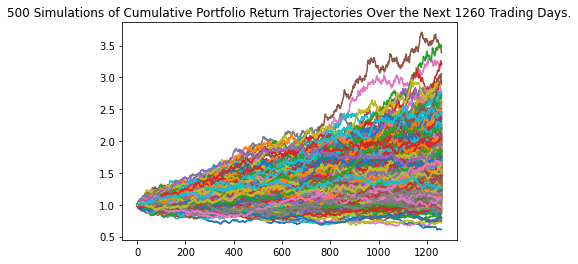

In [42]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

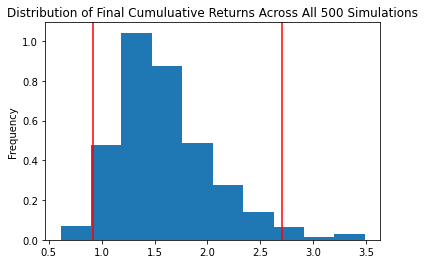

In [43]:
 # Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cumulative_return = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(sum_cumulative_return)

count           500.000000
mean              1.592329
std               0.451656
min               0.610139
25%               1.279148
50%               1.511355
75%               1.825932
max               3.488833
95% CI Lower      0.915362
95% CI Upper      2.703116
Name: 1260, dtype: float64


In [46]:
 # Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_cumulative_return[8]*60000,2)
ci_upper_five = round(sum_cumulative_return[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54921.7 and $162186.98


In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/katharinezenta/All Class notes/Week 5 APIs/Financial Planning homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995568,0.996209,0.999097,1.003633,1.008093,1.004578,1.000321,1.025338,1.006938,0.997983,...,1.003544,1.000886,1.007337,0.992916,0.985273,0.998848,1.015073,1.008857,0.993963,1.002044
2,1.001072,1.013903,1.000151,1.010848,1.011979,1.012560,1.002977,1.019808,1.013584,1.000240,...,1.003179,0.987624,1.008928,0.981685,0.983356,0.985922,1.026863,1.009438,0.986414,0.996209
3,1.007214,1.016017,1.022429,1.014254,1.001555,1.005892,0.996781,1.000654,1.009951,0.991942,...,1.011305,0.998637,1.022450,0.977695,0.995766,0.984535,1.036038,1.022439,0.980752,0.998132
4,1.004260,1.027308,1.025032,1.001468,1.010772,1.012751,0.991085,1.005368,1.011911,0.980599,...,1.005576,0.989682,1.008942,0.989856,0.994543,0.972819,1.040533,1.018080,0.974968,0.993706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.441460,3.046299,3.391418,2.593564,2.897013,1.446583,2.650497,1.278979,2.597406,1.602883,...,3.672312,2.366347,1.461383,1.243185,4.668476,3.788331,1.367803,6.527140,1.763619,2.259118
2517,1.438368,3.005359,3.391850,2.584779,2.892256,1.464847,2.641546,1.269024,2.599822,1.614428,...,3.660965,2.343100,1.467199,1.243425,4.688474,3.760615,1.376356,6.499200,1.790605,2.253139
2518,1.439121,3.044481,3.379258,2.598644,2.909506,1.443627,2.610871,1.274170,2.582324,1.624073,...,3.705424,2.350991,1.463129,1.242226,4.679253,3.790047,1.393592,6.466968,1.778783,2.271598
2519,1.455096,3.049341,3.463694,2.602280,2.912700,1.441200,2.623283,1.277165,2.584750,1.620859,...,3.686923,2.334380,1.453639,1.242391,4.708273,3.815032,1.396561,6.440504,1.792611,2.264803


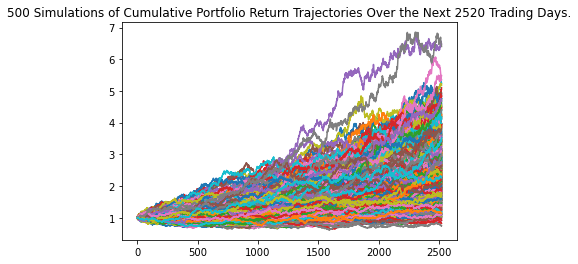

In [48]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

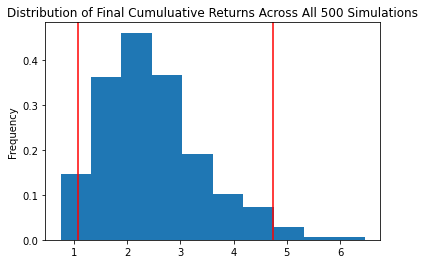

In [49]:
 # Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cumulative_return = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(sum_cumulative_return)

count           500.000000
mean              2.482644
std               0.953232
min               0.746880
25%               1.799817
50%               2.319425
75%               2.979781
max               6.468282
95% CI Lower      1.073686
95% CI Upper      4.749141
Name: 2520, dtype: float64


In [51]:
 # Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_cumulative_return[8]*60000,2)
ci_upper_ten = round(sum_cumulative_return[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $64421.17 and $284948.46
